# Bit flipping game with DQN solver

This is the implementation of the DQN solver for the bit flipping game in [**Hindsight Experience Replay**](https://arxiv.org/abs/1707.01495).

**Rerefence**:

1. Marcin Andrychowicz, Filip Wolski, Alex Ray, Jonas Schneider, Rachel Fong, Peter Welinder, Bob McGrew, Josh Tobin, Pieter Abbeel, Wojciech Zaremba, Hindsight Experience Replay


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from bitflipping import bitflipping as bf
from DQN import DQN

plt.rcParams['figure.figsize'] = [15, 20]
%matplotlib inline

## Set up the bit flipping game environment

In [2]:
init_state = np.array([0,1])
goal = np.ones((2,))
n = 5
bf_env = bf(init_state, goal, n)

## Build up the DQN neural network

In [3]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=(None, 2*n))
y = tf.placeholder(tf.float32, shape=(None, 1))


hid = [256]
agent = DQN(x, hid, n, discount=0.98, eps=1, annealing=0.8, tau = 0.95, replay_buffer_size=1e5, batch_size=64)

In [4]:
losses, success_all = agent.train_Q(x, y, epoch=10, cycles = 50, episode=32, T=n, iteration=40)

Epoch 0 Cycle 0 Episode 31: loss is 0.0846
Epoch 0 Cycle 1 Episode 31: loss is 0.087
Epoch 0 Cycle 2 Episode 31: loss is 0.0994
Epoch 0 Cycle 3 Episode 31: loss is 0.0418
Epoch 0 Cycle 4 Episode 31: loss is 0.0529
Epoch 0 Cycle 5 Episode 31: loss is 0.0664
Epoch 0 Cycle 6 Episode 31: loss is 0.0457
Epoch 0 Cycle 7 Episode 31: loss is 0.0686
Epoch 0 Cycle 8 Episode 31: loss is 0.034
Epoch 0 Cycle 9 Episode 31: loss is 0.0487
Epoch 0 Cycle 10 Episode 31: loss is 0.0289
Epoch 0 Cycle 11 Episode 31: loss is 0.0076
Epoch 0 Cycle 12 Episode 31: loss is 0.0334
Epoch 0 Cycle 13 Episode 31: loss is 0.0193
Epoch 0 Cycle 14 Episode 31: loss is 0.0492
Epoch 0 Cycle 15 Episode 31: loss is 0.00485
Epoch 0 Cycle 16 Episode 31: loss is 0.05
Epoch 0 Cycle 17 Episode 31: loss is 0.0194
Epoch 0 Cycle 18 Episode 31: loss is 0.0219
Epoch 0 Cycle 19 Episode 31: loss is 0.0118
Epoch 0 Cycle 20 Episode 31: loss is 0.0344
Epoch 0 Cycle 21 Episode 31: loss is 0.0201
Epoch 0 Cycle 22 Episode 31: loss is 0.0384
E

Epoch 3 Cycle 42 Episode 31: loss is 1.31
Epoch 3 Cycle 43 Episode 31: loss is 1.92
Epoch 3 Cycle 44 Episode 31: loss is 0.708
Epoch 3 Cycle 45 Episode 31: loss is 0.704
Epoch 3 Cycle 46 Episode 31: loss is 0.724
Epoch 3 Cycle 47 Episode 31: loss is 1.38
Epoch 3 Cycle 48 Episode 31: loss is 0.698
Epoch 3 Cycle 49 Episode 31: loss is 1.39
Epoch 4 Cycle 0 Episode 31: loss is 2.68
Epoch 4 Cycle 1 Episode 31: loss is 1.4
Epoch 4 Cycle 2 Episode 31: loss is 2.07
Epoch 4 Cycle 3 Episode 31: loss is 0.75
Epoch 4 Cycle 4 Episode 31: loss is 2.88
Epoch 4 Cycle 5 Episode 31: loss is 0.143
Epoch 4 Cycle 6 Episode 31: loss is 1.46
Epoch 4 Cycle 7 Episode 31: loss is 0.0942
Epoch 4 Cycle 8 Episode 31: loss is 2.17
Epoch 4 Cycle 9 Episode 31: loss is 2.22
Epoch 4 Cycle 10 Episode 31: loss is 0.812
Epoch 4 Cycle 11 Episode 31: loss is 0.793
Epoch 4 Cycle 12 Episode 31: loss is 1.79
Epoch 4 Cycle 13 Episode 31: loss is 0.0804
Epoch 4 Cycle 14 Episode 31: loss is 1.58
Epoch 4 Cycle 15 Episode 31: loss 

Epoch 7 Cycle 38 Episode 31: loss is 1.96
Epoch 7 Cycle 39 Episode 31: loss is 3.82
Epoch 7 Cycle 40 Episode 31: loss is 5.65
Epoch 7 Cycle 41 Episode 31: loss is 4.2
Epoch 7 Cycle 42 Episode 31: loss is 6.13
Epoch 7 Cycle 43 Episode 31: loss is 3.88
Epoch 7 Cycle 44 Episode 31: loss is 3.89
Epoch 7 Cycle 45 Episode 31: loss is 3.93
Epoch 7 Cycle 46 Episode 31: loss is 0.16
Epoch 7 Cycle 47 Episode 31: loss is 3.98
Epoch 7 Cycle 48 Episode 31: loss is 5.81
Epoch 7 Cycle 49 Episode 31: loss is 0.289
Epoch 8 Cycle 0 Episode 31: loss is 4.01
Epoch 8 Cycle 1 Episode 31: loss is 5.84
Epoch 8 Cycle 2 Episode 31: loss is 0.209
Epoch 8 Cycle 3 Episode 31: loss is 2.08
Epoch 8 Cycle 4 Episode 31: loss is 2.07
Epoch 8 Cycle 5 Episode 31: loss is 0.0797
Epoch 8 Cycle 6 Episode 31: loss is 4.07
Epoch 8 Cycle 7 Episode 31: loss is 4.04
Epoch 8 Cycle 8 Episode 31: loss is 4.06
Epoch 8 Cycle 9 Episode 31: loss is 4.1
Epoch 8 Cycle 10 Episode 31: loss is 7.86
Epoch 8 Cycle 11 Episode 31: loss is 4.44


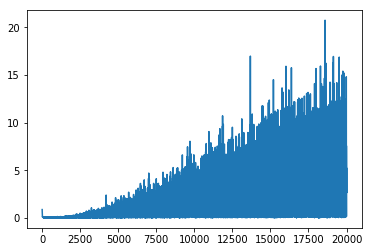

In [5]:
plt.figure()
plt.plot(losses)
plt.show()

## Test DQN

In [6]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, '/tmp/model.ckpt')
    
    success = 0
    for i in range(100):
        
        s_0 = agent._sample_state()
        goal = agent._sample_state()
        while np.array_equal(s_0, goal):
            goal = agent._sample_state()

        env = bf(s_0, goal, n)

        for i in range(n):
            X = np.concatenate((env.state.reshape((1,-1)),goal.reshape((1,-1))), axis=1)
            Q = sess.run(agent.targetModel, feed_dict={x: X})
            action = np.argmax(Q)
            env.update_state(action)
            if (env.reward(env.state)==0):
                print('Success! Initial state:{0}\t Goal state:{1}'.format(s_0, goal))
                success += 1
                break
            elif (i==n-1):
                print('Fail! Initial state:{0}\t Goal state:{1}'.format(s_0, goal))
                
    print('Success rate {}%'.format(success))

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Fail! Initial state:[0 1 0 1 1]	 Goal state:[0 0 1 1 0]
Fail! Initial state:[0 0 1 1 0]	 Goal state:[1 0 1 0 0]
Fail! Initial state:[0 1 1 0 1]	 Goal state:[1 1 1 1 0]
Fail! Initial state:[1 1 1 0 1]	 Goal state:[0 1 1 0 1]
Fail! Initial state:[1 0 0 1 1]	 Goal state:[0 0 0 1 0]
Fail! Initial state:[1 1 1 1 0]	 Goal state:[1 0 1 1 0]
Fail! Initial state:[0 1 1 0 1]	 Goal state:[1 0 0 1 0]
Fail! Initial state:[0 0 1 1 1]	 Goal state:[1 0 0 0 0]
Fail! Initial state:[0 0 1 0 0]	 Goal state:[1 0 0 0 0]
Fail! Initial state:[0 1 1 1 0]	 Goal state:[0 0 1 0 1]
Fail! Initial state:[0 1 0 1 0]	 Goal state:[0 1 1 0 0]
Fail! Initial state:[1 1 1 1 1]	 Goal state:[1 1 1 0 1]
Fail! Initial state:[1 1 0 0 0]	 Goal state:[0 0 1 0 1]
Fail! Initial state:[0 0 0 0 0]	 Goal state:[0 0 1 1 0]
Fail! Initial state:[0 0 1 1 1]	 Goal state:[0 0 1 0 0]
Success! Initial state:[1 0 0 1 0]	 Goal state:[1 0 1 1 0]
Fail! Initial state:[0 0 1 0 0]	 Goal state

In [7]:
a=np.array([[1,2,3,2,1,3]])

In [8]:
a.shape

(1, 6)

In [9]:
s=np.argmax(a)